<a href="https://colab.research.google.com/github/HardProxy/benchmarckHPC/blob/main/Siesta_LNCC_ClusteUFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Benchmark do Siesta BullX B700 Vs Cluster UFF

##Importando módulos de manipulação de dados e ferramentas de plotting

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

##Benchmark Cluster UFF

In [ ]:
threads = [1,3,4,5,6,7,8]
t_serial = 347.0
t_parallel = [316.0,144.0,123.0,150.0,138.0,131.0,121.0]
speedUp = []
eficiencia = []
for i in range(len(t_parallel)):
  speedUp.append(t_serial/t_parallel[i])
  eficiencia.append((t_serial - t_parallel[i])/t_serial)

Parâmetros de Execução


- Molécula de Benzeno
- Pseudopotenciais : H.psf, C.psf
- CG : 15 passos
- Mesh : 420 Ry

Valores de execução realizadas para apenas 1 único nó com configuração :
- CPU : Intel(R) Core(TM) i7-2600K CPU @ 3.40GHz
- RAM : 8 GB

###Grafico de Threads Vs Tempo de Execução

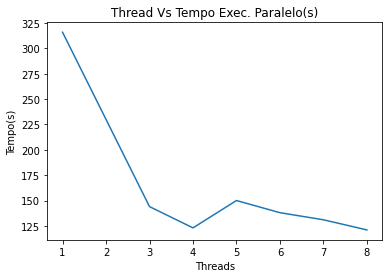

In [ ]:
# Plot Thread Vs Tempo Paralelo  
plt.title("Thread Vs Tempo Exec. Paralelo(s)")
plt.xlabel("Threads")
plt.ylabel("Tempo(s)")
plt.plot(threads,t_parallel)

Aqui podemos observar que threads multiplas de 4 são beneficiadas. Isso indica que os processadores são melhores aproveitados ao trabalhar em grupos de 4.

###Grafico de Threads Vs SpeedUp

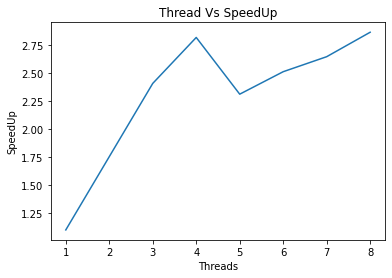

In [ ]:
# Plot Threads Vs SpeedUp
plt.title("Thread Vs SpeedUp")
plt.xlabel("Threads")
plt.ylabel("SpeedUp")
plt.plot(threads,speedUp)

Tal beneficio discutido anteriormente, reflete diretamente ao SpeedUp. Ou seja, a resolução via grupo de 4 threads têm maior SpeedUp.

###Grafico de Threads Vs Eficiência

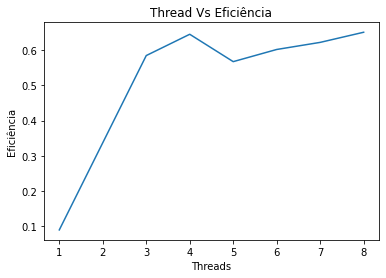

In [ ]:
# Plot Threads Vs Eficiência (t_serial - t_parallel[i])/t_serial
plt.title("Thread Vs Eficiência")
plt.xlabel("Threads")
plt.ylabel("Eficiência")
plt.plot(threads,eficiencia)

Da mesma maneira, trabalhar com um grupo de 4 threads reflete diretamente à eficiência atingida. Ou seja, a resolução via grupo de 4 threads têm maior eficiência.

##Benchmark BullX B700 - LNCC

In [ ]:
threads = [2,4,6,8,12,16,20,24]
t_serial = 569.0 #Siesta MPI serial 
t_parallel = [295.0,155.0,113.0,89.0,66.0,56.0,46.0,39.0] #Siesta MPI paralelo 1 Nó

#1 node  = 24 cores 
#2 nodes = 12 cores para cada
#3 nodes = 8  cores para cada
#4 nodes = 6  cores para cada 

t_parallel_nodes = [39.0,113.0,86.0,83.0]
nodes = [1,2,3,4]

speedUp = []
eficiencia = []
for i in range(len(t_parallel)):
  speedUp.append(t_serial/t_parallel[i])
  eficiencia.append((t_serial - t_parallel[i])/t_serial)

Parâmetros de execução do Siesta : 


- Molécula de Benzeno
- Pseudopotenciais : H.psf, C.psf
- CG : 15 passos
- Mesh : 420 Ry

Valores de execução realizadas para apenas 1 único nó com configuração :
- CPU : Intel Xeon E5-2695v2 Ivy Bridge, 2,4GHZ
- RAM : 64 GB 

###Grafico de Threads Vs Tempo de Execução

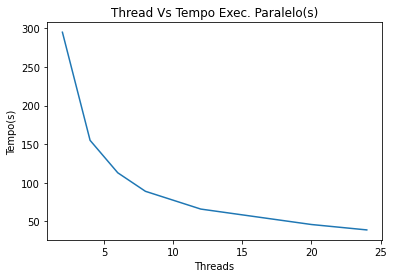

In [ ]:
# Plot Thread Vs Tempo Paralelo  
plt.title("Thread Vs Tempo Exec. Paralelo(s)")
plt.xlabel("Threads")
plt.ylabel("Tempo(s)")
plt.plot(threads,t_parallel)

Vemos que, diferentemente no Cluster, o BullX B700 traz consigo uma maior escalabilidade, diminuindo cada vez mais o tempos de execução para o numero de threads par.

###Grafico de Threads Vs SpeedUp

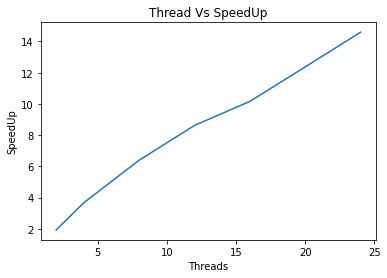

In [ ]:
# Plot Threads Vs SpeedUp
plt.title("Thread Vs SpeedUp")
plt.xlabel("Threads")
plt.ylabel("SpeedUp")
plt.plot(threads,speedUp)

O SpeedUp nessa máquina traz um comportamento aproximadamente linear para uma evolução do número de threads par. 

###Grafico de Threads Vs Eficiência

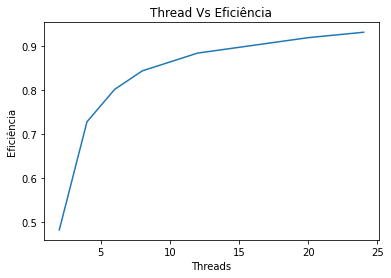

In [ ]:
# Plot Threads Vs Eficiência (t_serial - t_parallel[i])/t_serial
plt.title("Thread Vs Eficiência")
plt.xlabel("Threads")
plt.ylabel("Eficiência")
plt.plot(threads,eficiencia)

Nesse caso, a eficiência é afetada diretamente. Extrapolando o comportamento da curva, indica-se uma estabilização no valor de eficiência à medida que se aumenta o número de threads.

###Gráfico de Número de Nós Vs Tempo de Execução 

Número de Cores fixo em 24 cores, variamos aqui o número de nós evolvidos no processo de resolução do problema.

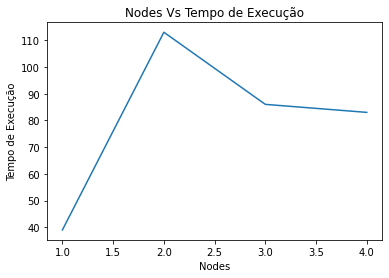

In [ ]:
# Plot  Nodes Vs Tempo de Execução
plt.title("Nodes Vs Tempo de Execução")
plt.xlabel("Nodes")
plt.ylabel("Tempo de Execução")
plt.plot(nodes,t_parallel_nodes)

Podemos observar um que o tempo de troca de informações entre nós afeta diretamente no tempo de execução. Obtemos o valores mais altos para o tempo de execução em que utilizam a comunicação entre nós.